# **Séance 2 : Lois de probabilités et ajustements**
### **Professeur** : Christophe Ancey
#### **Assistants** : 
- Yanan Chen
- Sofi Farazande
- Clemente Gotelli


## 1. Lois de probabilités et ajustements
### 1.1 Ajustement d’une loi

L’ajustement le plus simple est de chercher la loi ayant les mêmes moments que les séries de données.
Les moments de la série sont :

Moyenne ($1^{er}$ moment): $$\mu = \int XdP = \dfrac{1}{N}$$  

Variance ($2^{ème}$ moment): $$ \sigma^2=\int (X-\mu)^2 dP = \dfrac{1}{N}\sum (x_i-\mu)^2 $$

Le nombre de paramètres de la loi donne le nombre de moments à égaliser. Trois séries de données
(*serie01.txt, serie02.txt et serie03.txt*) ont été obtenues lors d’expériences et on cherche à les carac-
tériser à l’aide d’une loi de probabilités (loi uniforme, loi exponentielle, loi gaussienne, loi de Cauchy,
loi gamma, etc.). (Voir Annexe 1 du cours pour une description de ces lois)

#### Exercices
1. Tracer premièrement l’histogramme normalisé de chacun de ces tirages. Leurs allures vous paraissent-elles familières ? `[seaborn.displot]`

**Solution:**

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
from scipy.stats import norm, skew
from sklearn.datasets import fetch_openml
from tqdm import tqdm

# !pip install jupyter-black
%load_ext jupyter_black

plt.style.use('seaborn-pastel')

In [2]:
# We load the data files
df01 = pd.read_csv("data/serie01.csv")
df02 = pd.read_csv("data/serie02.csv")
df03 = pd.read_csv("data/serie03.csv")
df00 = pd.concat([df01, df02, df03], axis=1)

# We show the heading
df00.head(3)

,serie 01,serie 02,serie 03
0,0.918085,3.983825,21.582882
1,1.266970,2.816426,16.964624
2,9.175936,4.082308,24.121335


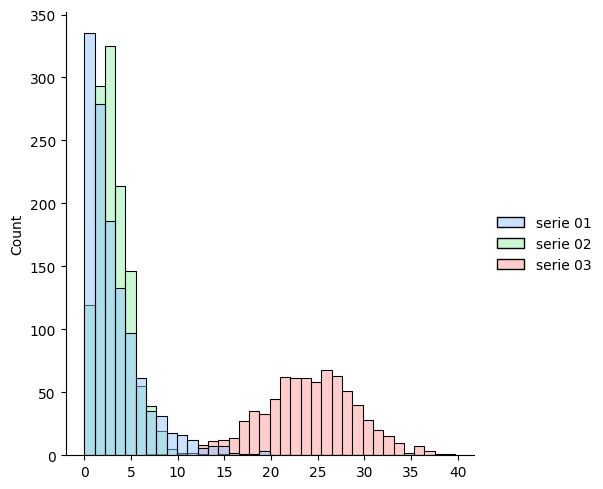

In [3]:
# We plot the three histograms together.
sns.displot(data=df00)
plt.show()

2. Calculer leurs premiers moments. `[dataframe.describe(), scipy.stats.describe]`

**Solution:**

In [4]:
# We can use the tool describe available with pandas dataframe
df01.describe()

,serie 01
count,1230.000000
mean,3.150386
std,3.076817
min,0.000241
25%,1.002825
50%,2.209143
75%,4.300561
max,19.374621


In [5]:
# Or the tool describe of scipy.stats
st.describe(df01)

DescribeResult(nobs=1230, minmax=(array([0.0002411]), array([19.37462143])), mean=array([3.15038585]), variance=array([9.46680489]), skewness=array([1.89464633]), kurtosis=array([4.43633706]))

In [6]:
st.describe(df02)

DescribeResult(nobs=1219, minmax=(array([0.01880276]), array([14.50530873])), mean=array([3.15934847]), variance=array([3.3377994]), skewness=array([1.08861752]), kurtosis=array([2.04653548]))

In [7]:
st.describe(df03)

DescribeResult(nobs=741, minmax=(array([7.34798478]), array([39.74351225])), mean=array([24.10571054]), variance=array([25.06235688]), skewness=array([-0.08202294]), kurtosis=array([-0.01590464]))

3. Comparer les densités de probabilité théoriques aux histogrammes de données. `[seaborn.histplot, scipy.stats.-.fit, scipy.stats.-.pdf]`

**Solution:**

Some distributions available in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html): 

- scipy.stats.beta,
- scipy.stats.cauchy,
- scipy.stats.chi2,
- scipy.stats.dgamma, 
- scipy.stats.dweibull,
- scipy.stats.expon,
- scipy.stats.gamma, 
- scipy.stats.gengamma, 
- scipy.stats.gumbel_r, 
- scipy.stats.gumbel_l, 
- scipy.stats.logistic, 
- scipy.stats.lognorm, 
- scipy.stats.norm, 
- scipy.stats.pearson3, 
- scipy.stats.rayleigh, 
- scipy.stats.uniform, 


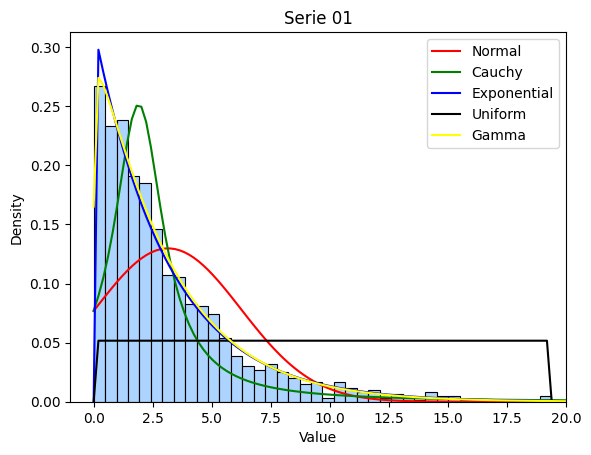

In [8]:
data = df00["serie 01"].copy()

ax = sns.histplot(data, bins=40, stat="density", kde=False)
sample = np.linspace(0, 20, 100)

normal_params = st.norm.fit(data)
cauchy_params = st.cauchy.fit(data)
exponential_params = st.expon.fit(data)
uniform_params = st.uniform.fit(data)
gamma_params = st.gamma.fit(data)

ax.plot(
    sample,
    st.norm.pdf(sample, normal_params[0], normal_params[1]),
    color="red",
    label="Normal",
)
ax.plot(
    sample,
    st.cauchy.pdf(sample, cauchy_params[0], cauchy_params[1]),
    color="green",
    label="Cauchy",
)
ax.plot(
    sample,
    st.expon.pdf(sample, exponential_params[0], exponential_params[1]),
    color="blue",
    label="Exponential",
)
ax.plot(
    sample,
    st.uniform.pdf(sample, uniform_params[0], uniform_params[1]),
    color="black",
    label="Uniform",
)
ax.plot(
    sample,
    st.gamma.pdf(sample, gamma_params[0], gamma_params[1], gamma_params[2]),
    color="yellow",
    label="Gamma",
)

ax.legend(loc="best")
ax.set_xlabel("Value")
ax.set_xlim((-1, 20))
ax.set_title("Serie 01")
plt.show()

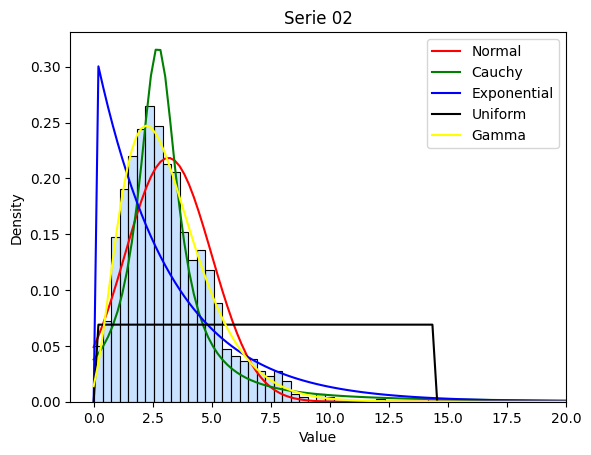

In [9]:
data = df02.copy()

ax = sns.histplot(data, bins=40, stat="density", kde=False)
sample = np.linspace(0, 20, 100)

normal_params = st.norm.fit(data)
cauchy_params = st.cauchy.fit(data)
exponential_params = st.expon.fit(data)
uniform_params = st.uniform.fit(data)
gamma_params = st.gamma.fit(data)

ax.plot(
    sample,
    st.norm.pdf(sample, normal_params[0], normal_params[1]),
    color="red",
    label="Normal",
)
ax.plot(
    sample,
    st.cauchy.pdf(sample, cauchy_params[0], cauchy_params[1]),
    color="green",
    label="Cauchy",
)
ax.plot(
    sample,
    st.expon.pdf(sample, exponential_params[0], exponential_params[1]),
    color="blue",
    label="Exponential",
)
ax.plot(
    sample,
    st.uniform.pdf(sample, uniform_params[0], uniform_params[1]),
    color="black",
    label="Uniform",
)
ax.plot(
    sample,
    st.gamma.pdf(sample, gamma_params[0], gamma_params[1], gamma_params[2]),
    color="yellow",
    label="Gamma",
)

ax.legend(loc="best")
ax.set_xlabel("Value")
ax.set_xlim((-1, 20))
ax.set_title("Serie 02")
plt.style.use("seaborn-pastel")
plt.show()

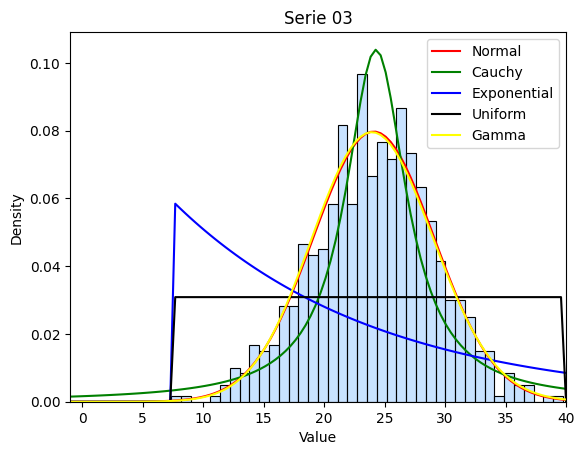

In [10]:
data = df03.copy()
xlims = (-1, 40)
ax = sns.histplot(data, bins=40, stat="density", kde=False)
sample = np.linspace(*xlims, 100)

normal_params = st.norm.fit(data)
cauchy_params = st.cauchy.fit(data)
exponential_params = st.expon.fit(data)
uniform_params = st.uniform.fit(data)
gamma_params = st.gamma.fit(data)

ax.plot(
    sample,
    st.norm.pdf(sample, normal_params[0], normal_params[1]),
    color="red",
    label="Normal",
)
ax.plot(
    sample,
    st.cauchy.pdf(sample, cauchy_params[0], cauchy_params[1]),
    color="green",
    label="Cauchy",
)
ax.plot(
    sample,
    st.expon.pdf(sample, exponential_params[0], exponential_params[1]),
    color="blue",
    label="Exponential",
)
ax.plot(
    sample,
    st.uniform.pdf(sample, uniform_params[0], uniform_params[1]),
    color="black",
    label="Uniform",
)
ax.plot(
    sample,
    st.gamma.pdf(sample, gamma_params[0], gamma_params[1], gamma_params[2]),
    color="yellow",
    label="Gamma",
)

ax.legend(loc="best")
ax.set_xlabel("Value")
ax.set_xlim(xlims)
ax.set_title("Serie 03")
plt.style.use("seaborn-pastel")
plt.show()

4. Pour les données serie03.txt, tracer un diagramme de quantile avec la loi trouvée précédemment et comparer le avec la bissectrice. La loi trouvée vous parait-elle adaptée? `[scipy.stats.probplot]`

**Solution:**

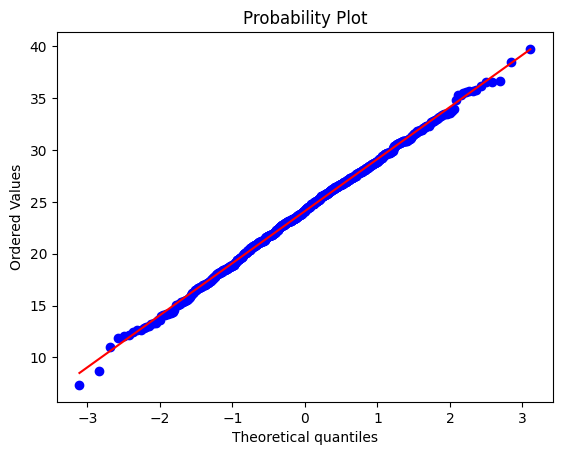

In [11]:
# For this we use the function  probplot
st.probplot(df03["serie 03"], dist="norm", plot=plt)
plt.show()

### 1.2 Loi binômiale et loi de Poisson

La loi binômiale (notée $\mathbf{B}$) vient de la somme de $m$ variables aléatoires de type Bernoulli de paramètre $p$. Pour un nombre de succès petit, celle-ci peut être
approchée par une loi de Poisson (notée $\mathbf{P}$), plus simple dans la pratique. Mais sous quelles conditions ?

#### Exercices
1. $p$ fixé.  
    - Tracer en fonction de $k$ la probabilité $P(X=k) $ avec $ X \simeq \mathbf{B}(100\ ;\ 0,1)$ pour $ k=1 \cdots 30$ `[scipy.stats.binom.pmf]`
    - Tracer en fonction de $k$ la probabilité $P(X=k)$ avec $X \simeq \mathbf{P}(100 \cdot 0,1)$ pour $ k=1 \cdots 30$ `[scipy.stats.poisson.pmf]`  
    
**Solution:**

You can check the information about both distributions [here](https://www.alphacodingskills.com/scipy/scipy-binomial-distribution.php) and [here](https://www.alphacodingskills.com/scipy/scipy-poisson-distribution.php).


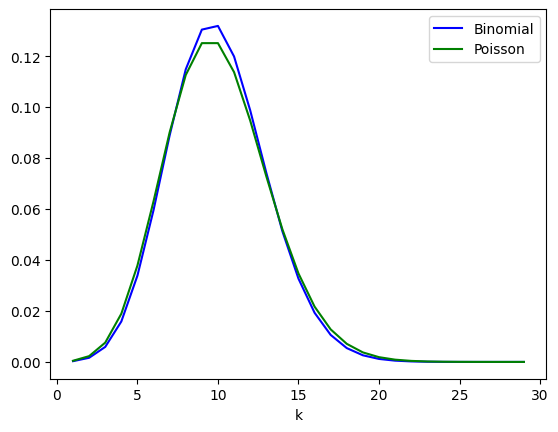

In [12]:
# p fixed

k = np.arange(1, 30, 1)
p = 0.1
n = 100

binom_dist = st.binom.pmf(k, n, p, loc=0)
poisson_dist = st.poisson.pmf(k, n * p, loc=0)
plt.plot(k, binom_dist, "b-", label="Binomial")
plt.plot(k, poisson_dist, "g-", label="Poisson")
plt.xlabel("k")
plt.legend()
plt.show()

2.  $k$ fixé.  
    - Tracer en fonction de $p$ la probabilité $P(X=5) $ avec $X \simeq \mathbf{B}(100\ ;\ p)$ pour $ p=0,01 \cdots 0,2$
    - Tracer (sur la même figure) en fonction de $p$ la probabilité $P(X=5)$ avec $X \simeq \mathbf{P}(100 \cdot p)$ pour $ p=0,01 \cdots 0,2$
    
**Solution:**

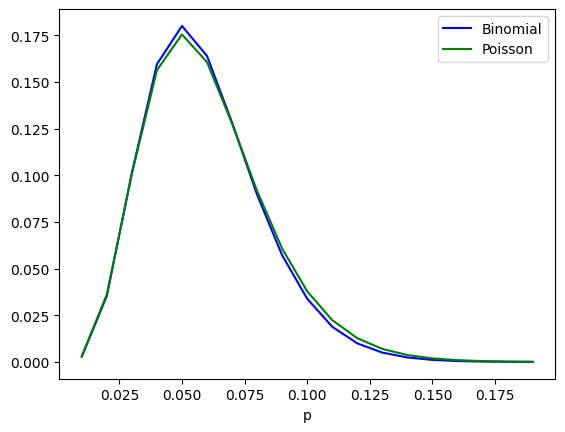

In [13]:
# k fixed

k = 5
p = np.arange(0.01, 0.2, 0.01)
n = 100

binom_dist = st.binom.pmf(k, n, p, loc=0)
poisson_dist = st.poisson.pmf(k, n * p, loc=0)
plt.plot(p, binom_dist, "b-", label="Binomial")
plt.plot(p, poisson_dist, "g-", label="Poisson")
plt.xlabel("p")
plt.legend()
plt.show()

3. Condition sur $p$ pour $k \in [0\ ;\ 20]$.
    - Calculer le maximum de l'erreur relative sur $P(X=k)$ entre la loi binômiale et la loi de Poisson pour $ p=0,01 \cdots 0,2$. On tracera le graphique de l'erreur en fonction de $p$.
    - Trouver la condition sur $p$ pour que l'erreur absolue entre les deux lois soit de moins de $10$~\% quel que soit $k$ ?
    
**Solution:**

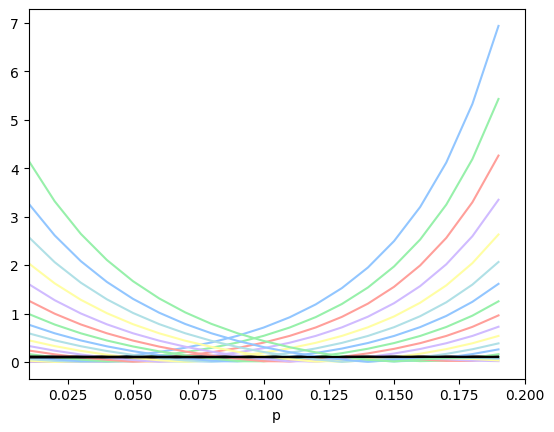

In [14]:
k = np.arange(1, 30, 1)
p = np.arange(0.01, 0.2, 0.01)
n = 100

for k in range(0, 20):

    binom_dist = st.binom.pmf(k, n, p, loc=0)
    poisson_dist = st.poisson.pmf(k, n * p, loc=0)
    error = np.abs((binom_dist - poisson_dist) / binom_dist)
    # plt.plot(p, binom_dist, "b-", label="Binomial")
    # plt.plot(p, poisson_dist, "g-", label="Poisson")
    plt.plot(p, error, label="k= " + str(k))
    plt.plot(p, np.ones(19) * 0.1, "-k")
    plt.xlim((0.01, 0.2))
    plt.xlabel("p")
    # plt.legend()

plt.show()

4. *Question facultative :* les paramètres $k$ et $p$ ont tous les deux une influence sur la valeur de l'erreur commise entre ces deux lois. Tracer un graphique 3D du logarithme de l'erreur en fonction de $p$ et de $k$ pour $p \in [0,001\ ;\ 0,5]$ et $k \in [1\ ;\ 50]$. Concluez. `[meshgrid,mesh]`

**Solution:**

## 2. Le paradoxe de Pétersbourg

Un joueur va au casino pour faire fortune. Grâce à son cours de probabilité, il a développé une stratégie qu'il pense infaillible : il commence par miser la mise minimale sur une couleur (rouge ou noire). Quand il perd il rejoue en doublant son enjeu. S'il perd  à nouveau il double une nouvelle fois son enjeu, etc. Une fois qu'il a gagné, il recommence avec la mise minimale. Cette stratégie est-elle payante ?  Plus prudent que le joueur, vous lui proposez de simuler cette stratégie avant de l'appliquer :

#### Exercices 

- La fortune au début est de 100 fois la mise minimale, l'enjeu de départ est alors 1. Tant que sa fortune est supérieure à l'enjeu que lui impose sa stratégie, il joue.

	- Il perd avec une probabilité de $P=0,5$ ; la mise est doublée, sa fortune diminue de la mise perdue;
    - Il gagne avec une probabilité de $P=0,5$ : la mise retombe à 1 et sa fortune  augmente de la mise ;   
    
- Comme le joueur n'est pas trop téméraire, il s'arrête de jouer lorsqu'il a doublé sa fortune initiale.
      
1. Simuler cette stratégie. Faire un diagramme de sa fortune.  

**Solution:**

In [15]:
fortune_final = np.array([])
fortune_initial = 100
mise_initial = 5
nexp = 2000
num_play_hist = np.array([])

for j in range(0, nexp):
    fortune = fortune_initial
    mise = mise_initial
    num_play = 1
    while fortune < 2 * fortune_initial and fortune > mise:
        p = np.random.rand()
        if p > 0.5:
            # Wins
            # print("He wins")
            fortune = fortune + mise
            mise = mise_initial
        else:
            # Loses
            fortune = fortune - mise
            mise = mise * 2

        num_play = num_play + 1

    num_play_hist = np.append(num_play_hist, num_play)
    fortune_final = np.append(fortune_final, fortune)

2. Enregistrer la fortune finale et calculer la moyenne.  

**Solution:**

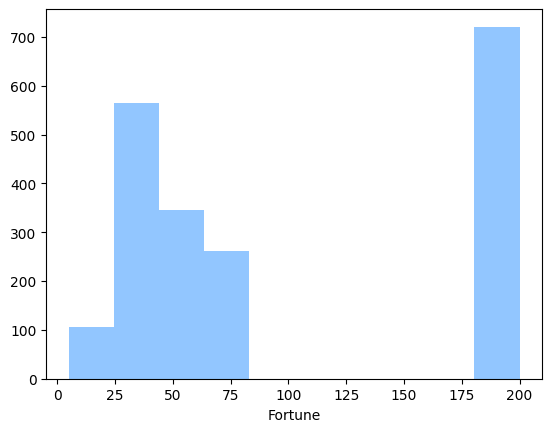

In [16]:
plt.hist(fortune_final)
plt.xlabel("Fortune")
plt.show()

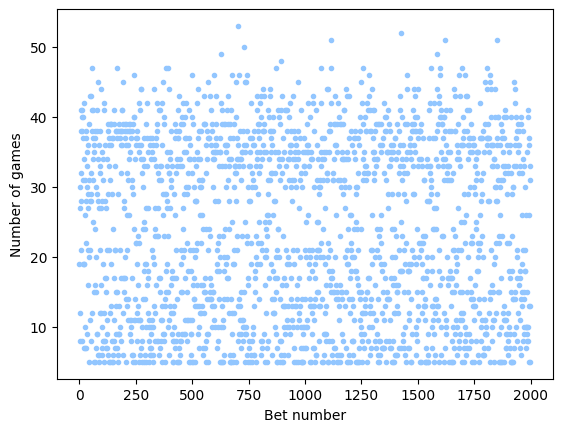

In [17]:
# We plot the fortune in time
plt.plot(num_play_hist, ".", label="Fortune time series")
plt.xlabel("Bet number")
plt.ylabel("Number of games")
plt.show()

In [18]:
np.mean(fortune_final)

100.2475

> **Explication du paradoxe :**  
Pour mettre en évidence l'aspect paradoxal de ce problème, il faut considérer que, quelle que soit la mise initiale, l'espérance mathématique de gain est positive, et même infinie, pour le joueur. Pourtant, tout quidam sain d'esprit refusera de jouer à un tel jeu si la mise initiale est trop élevée. Ce comportement d'apparence irrationnelle s'appelle l'aversion au risque. Il a été formalisé par la notion de fonction d'utilité et a donné naissance à la théorie de la décision.  
Une solution simple à ce paradoxe consiste à faire l'hypothèse réaliste que la banque n'est pas infiniment riche, et qu'elle va donc cesser de payer au-delà d'une certaine somme. Par exemple, si on suppose qu'elle ne dispose << que >> de 4 000 000 CHF soit $2^{22}$ CHF, le jeu va cesser au 22$^{\mathrm{ème}}$ coup et la mise équitable sera alors de 22 CHF.